# Data Distribution

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
#navigate to parent directory
parent_dir = os.path.dirname(os.getcwd())

#setting the filenames
training_file = os.path.join(parent_dir, 'data/train/Bitext_Sample_Customer_Service_Training_Dataset.csv')

#opening the files
training_df = pd.read_csv(training_file)

In [5]:
# retain only categories with intents more than 2
df = training_df[training_df["category"].isin(['ACCOUNT', 'CONTACT', 'ORDER', 'PAYMENT', 'REFUND', 'SHIPPING_ADDRESS'])]

## INTENTS

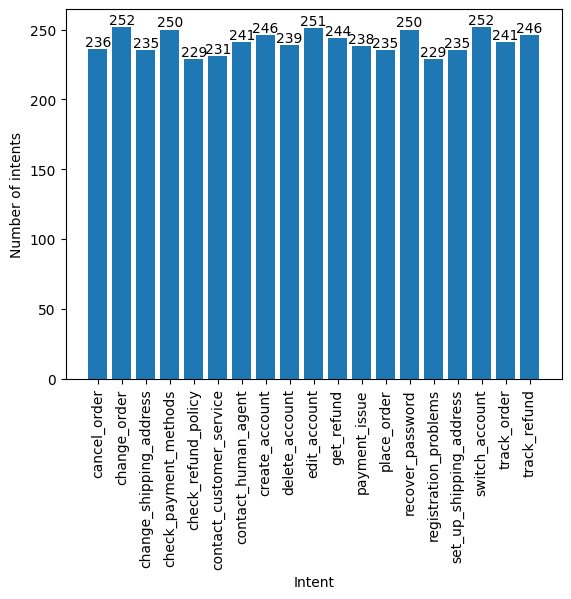

In [6]:
# Create a dictionary to store the number of intents for each class
intent_counts = {}
for intent in df['intent'].unique():
    intent_counts[intent] = len(df[df['intent'] == intent])

# Plot the distribution of intents using Matplotlib
plt.bar(list(intent_counts.keys()), list(intent_counts.values()))
for i, (intent, count) in enumerate(intent_counts.items()):
    plt.annotate(f"{count}", (i, count), ha='center', va='bottom', size=10)
plt.xlabel('Intent')
plt.ylabel('Number of intents')
plt.xticks(list(intent_counts.keys()), list(intent_counts.keys()), rotation=90)
plt.show()

## TAGS

In [7]:
def remove_tags(tags):
    new_tags = ""
    for char in tags:
        # if char not in ['B','I','L', 'N', 'G']:
        if char in ['P', 'W', 'C', 'Q', 'Z']:
            new_tags += char
    return new_tags

In [8]:
df['tags'] = df['tags'].apply(remove_tags)

/tmp/ipykernel_15596/3302455684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(remove_tags)


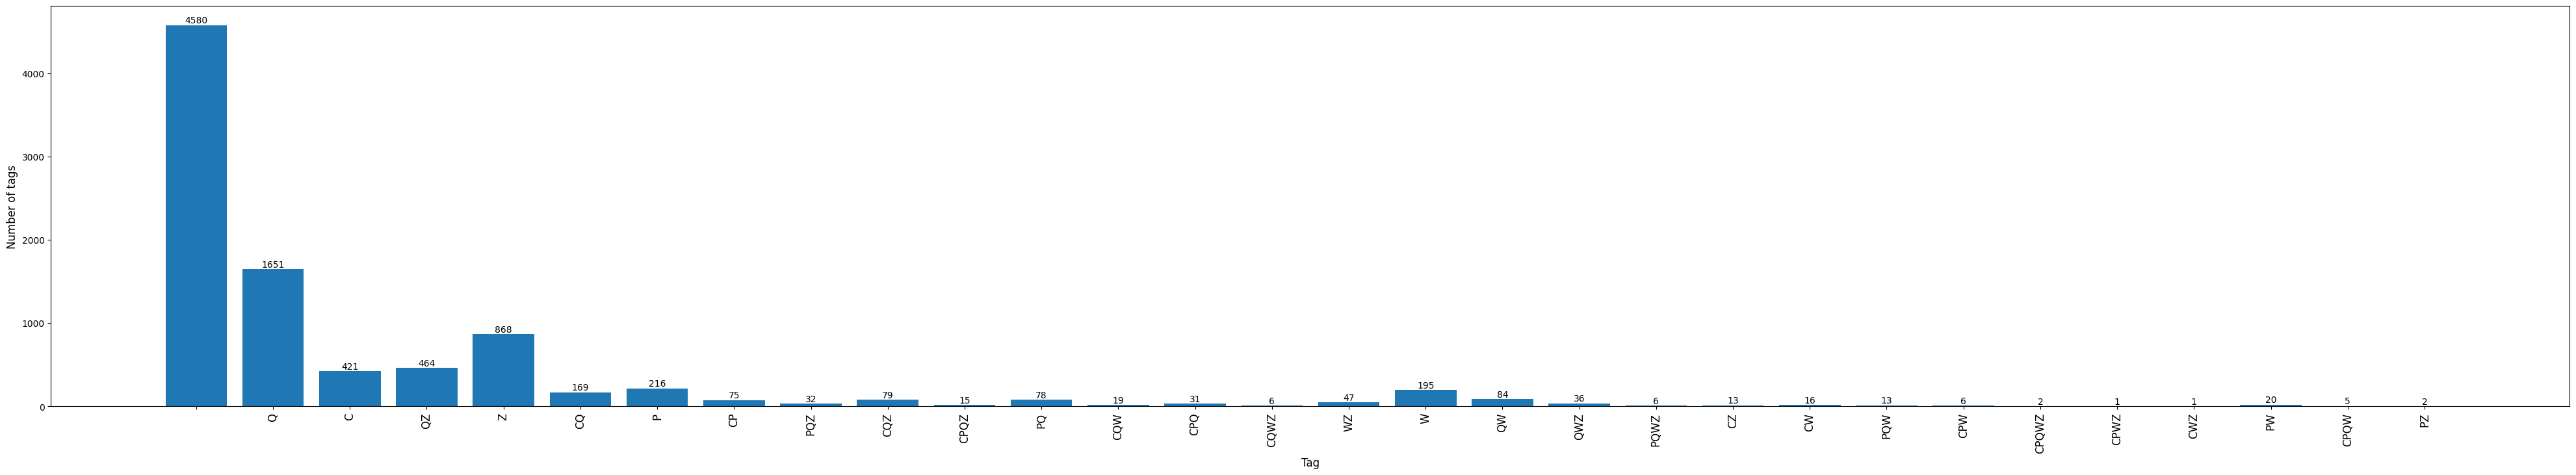

In [9]:
# Create a dictionary to store the number of tags for each class
tag_counts = {}
for tag in df['tags'].unique():
    tag_counts[tag] = len(df[df['tags'].str.contains(tag)])

# Plot the distribution of tags using Matplotlib
plt.figure(figsize=(50, 8))
plt.bar(list(tag_counts.keys()), list(tag_counts.values()))
for i, (tag, count) in enumerate(tag_counts.items()):
    plt.annotate(f"{count}", (i, count), ha='center', va='bottom', size=10)
plt.xlabel('Tag', fontsize=12)
plt.ylabel('Number of tags', fontsize=12)
plt.xticks(list(tag_counts.keys()), list(tag_counts.keys()), rotation=90, fontsize=12)
plt.show()
